# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


<font color=006699>

    
Цель работы - ответить на вопросы: <br>
-Есть ли зависимость между наличием детей и возвратом кредита в срок?<br>
-Есть ли зависимость между семейным положением и возвратом кредита в срок?<br>
-Есть ли зависимость между уровнем дохода и возвратом кредита в срок?<br>
-Как разные цели кредита влияют на его возврат в срок?<br>
    
    
Работать будем с выгрузкой данных data.csv. <br>Планируем изучить данные визуально, предобработать их заменив пропуски, исключить дублирование, если оно есть. Также планируем лемматизировать данные для дальнейшего анализа и категоризации.<br>

Содержание работы:
1. [Изучение данных](#p1)
2. [Предобработка данных](#p2) 
    <br>2.1 [Обработка пропусков](#p2_1)
    <br>2.2 [Замена типа данных](#p2_2)
    <br>2.3 [Обработка дубликатов](#p2_3)
    <br>2.4 [Лемматизация](#p2_4)
    <br>2.5 [Категоризация данных](#p2_5)
3. [Ответ на вопросы](#p3) 
4. [Общий вывод](#p4) 
</font>


###  Изучение данных <a name="p1"></a>

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<b>Вывод 

Названия столбцов вполне корректные.

Обнаружены пустые значения в столбцах `days_employed`, `total_income`. Это количественные переменные.

Одновременно с этим, визуально наблюдаются странности с Количеством отработанных дней: есть отрицательные значения, что в теории невозможно.

### Предобработка данных <a name="p2"></a>

#### Обработка пропусков <a name="p2_1"></a>

Проанализируем пропуски в столбце **Доход**.

In [5]:
df[df['total_income'].isna()].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Вычислим медианный и средний доход по типу занятости кредитуемых.

In [6]:
df.groupby('income_type').agg({'total_income':['count','median','mean']})

total_income                              
                       count         median           mean
income_type                                               
безработный                2  131339.751676  131339.751676
в декрете                  1   53829.130729   53829.130729
госслужащий             1312  150447.935283  170898.309923
компаньон               4577  172357.950966  202417.461462
пенсионер               3443  118514.486412  137127.465690
предприниматель            1  499163.144947  499163.144947
сотрудник              10014  142594.396847  161380.260488
студент                    1   98201.625314   98201.625314

Поскольку есть категории с малой выборкой, среднее по типу дохода не очень информативно.

Проанилизируем доход по возрастным категориям разбив их на 3 группы возраста:
1. до 30 лет (студенты, начало карьеры)
2. 30-50 лет (активная трудовая деятельность)
3. 50-75 лет (закат карьеры, пенсионеры)

In [7]:
df['age_groups'] = pd.cut(df['dob_years'],[df['dob_years'].min(),30,50,df['dob_years'].max()],right=False,
                          labels=['0 - 30','30 - 50','50 - 100'])
df.groupby('age_groups').agg({'total_income':['count','median','mean']})

total_income                              
                  count         median           mean
age_groups                                           
0 - 30             2975  142183.724613  159549.040225
30 - 50            9943  154513.982083  177678.900933
50 - 100           6432  133663.456146  155210.817900

Заменим Nan на медианный доход по соответствующей возрастной группе и проверим себя.

In [8]:
df['total_income'] = df['total_income'].fillna(df.groupby('age_groups')['total_income'].transform('median'))
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_groups


Анализируя столбец **общий трудовой стаж в днях**, не совсем понятно, как вообще стаж может быть отрицательным и почему он настолько дробный.

In [9]:
# преобразуем дни в года
df['working_years'] = df['days_employed'] / 365
df[['days_employed','working_years']].sort_values(by='days_employed', ascending=False).head(5)

,days_employed,working_years
6954,401755.400475,1100.699727
10006,401715.811749,1100.591265
7664,401675.093434,1100.479708
2156,401674.466633,1100.477991
7794,401663.850046,1100.448904


Более того, есть вопрос, как человек может проработаь 1100 лет?
Можно сделать вывод, что данные в столбце days_employed очень странные и не понятно в какую сторону их модернизировать. Может название столбца вводит нас в заблуждение и это не дни, а часы? 

Мы бы предложили задать вопрос разработчику, но поспольку в ТЗ от зказчика нет задания просчитать зависимость отработанных дней и возврата кредита, пока просто заменим Nan на пустоту.

In [10]:
df['days_employed'] = df['days_employed'].fillna('')
df.drop(['age_groups','working_years'], axis='columns', inplace=True) #удаляю ненужные дополнительно созданные столбцы

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null object
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


<b> Вывод 

Мы обработали пропуски для дальнейшнй работы. 

Есть вопросы к данным, но на реализацию итоговой задачи недостатки выборки повлиять не должны.

#### Замена типа данных <a name="p2_2"></a>

Для удобства восприятия преобразуем Доход в целочисленные значения.

Да, мы теряем копейки, но для нашей задачи они не сильно важны. 

Да и пенсионеры тут с медианным доходом в 118 тысяч какие-то зажиточные))
Может быть банк нероссийский конечно)

In [12]:
df['total_income'].astype('int')

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int64

Так-то лучше.

Проверим данные на дубли.

####  Обработка дубликатов <a name="p2_3"></a>

In [2]:
df[df.duplicated()].sort_values(by='dob_years', ascending=True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19321,0,NaN,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,NaN,сделка с подержанным автомобилем
18328,0,NaN,29,высшее,0,женат / замужем,0,M,сотрудник,0,NaN,покупка жилой недвижимости
21281,1,NaN,30,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,покупка коммерческой недвижимости
18349,1,NaN,30,высшее,0,женат / замужем,0,F,госслужащий,0,NaN,покупка жилья для семьи
13878,1,NaN,31,среднее,1,женат / замужем,0,F,компаньон,0,NaN,покупка жилья
16904,1,NaN,32,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,на покупку подержанного автомобиля
4182,1,NaN,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,NaN,свадьба
9238,2,NaN,34,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,покупка жилья для сдачи
13773,0,NaN,35,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,сыграть свадьбу
14432,2,NaN,36,высшее,0,женат / замужем,0,F,госслужащий,0,NaN,получение образования


In [14]:
print ('Дубликатов в таблице:', df.duplicated().sum() )

Дубликатов в таблице: 54


Поскольку в таблице нет установочных данных, есть вероятность полного дублирования строк. В таблице выше визуально видно, что строки, отобраные как дубли, на самом деле не дубли, поэтому метод `drop duplicates` мы здесь использовать не можем.

Ранее визуально было замечено дублирование видов образования с учетом регистра. Проверим насколько все серьезно

In [15]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Некрасиво. Возможно разработчикам стоит перепроверить справочник для исключения подобного рода дублирования.

Переведем все виды образования в нижний регистр

In [16]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Намного лучше)

Проверим на дублирование столбец "Цель кредита".

In [17]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Видно, что многие цели повторяются и ввиду отсутствия или некорректности справочника записаны в разных вариациях.

Лемматизируем данные для дальнейшей категоризации.

#### Лемматизация <a name="p2_4"></a>

In [18]:
from pymystem3 import Mystem
m = Mystem()
df['lemmas'] = df['purpose'].map(m.lemmatize) #формируем столбец с леммами
df['lemmas'].head(5)

0                 [покупка,  , жилье, \n]
1       [приобретение,  , автомобиль, \n]
2                 [покупка,  , жилье, \n]
3    [дополнительный,  , образование, \n]
4               [сыграть,  , свадьба, \n]
Name: lemmas, dtype: object

Посчитаем количество лемм из возможных целей кредита и отсортируем по убыванию

In [19]:
from collections import Counter 
lemmas_purpose = df.lemmas.map(Counter).sum()
lemmas_purpose.most_common()

[(' ', 33677),
 ('\n', 21525),
 ('недвижимость', 6367),
 ('покупка', 5912),
 ('жилье', 4473),
 ('автомобиль', 4315),
 ('образование', 4022),
 ('с', 2924),
 ('операция', 2610),
 ('свадьба', 2348),
 ('свой', 2235),
 ('на', 2233),
 ('строительство', 1881),
 ('высокий', 1375),
 ('получение', 1316),
 ('коммерческий', 1315),
 ('для', 1294),
 ('жилой', 1233),
 ('сделка', 944),
 ('дополнительный', 909),
 ('заниматься', 908),
 ('проведение', 777),
 ('сыграть', 774),
 ('сдача', 653),
 ('семья', 641),
 ('собственный', 635),
 ('со', 630),
 ('ремонт', 612),
 ('подержанный', 489),
 ('подержать', 479),
 ('приобретение', 462),
 ('профильный', 436)]

Глядя на результат, можно выделить общие цели и их унифицировать. 

Попробуем классифицировать цели кредита так:
- свадьба
- недвижимость
- коммерческая недвижимость (выделим в отдельную категорию)
- автомобиль
- образование
- ремонт

Можно сгруппировать все и подругому, например, цель "покупка жилья для сдачи" выделить в отдельную категорию или добавить к коммерческой недвижимости. Но для этого нужна консультация с заказчиком исследования. Пока оставим так.

#### Категоризация данных <a name="p2_5"></a>

Напишем функцию, присваивающую каждой строке одну из категоризированных выше целей.

In [20]:
def new_category(text):
    if 'свадьба' in text:
        return 'свадьба'
    elif 'коммерческий' in text:
        return 'коммерческая недвижимость'  
    elif 'автомобиль' in text:
        return 'автомобиль'
    elif 'образование' in text:
        return 'образование'
    elif 'ремонт' in text:
        return 'ремонт'
    else:
        return 'недвижимость' 

Применим функцию к лемматизированному столбцу. Созданим новый столбец с категоризированными целями. Посчитаем количество значений по категориям.

In [21]:
df['purpose_cat'] = df['lemmas'].apply(new_category)
df['purpose_cat'].value_counts()

недвижимость                 8913
автомобиль                   4315
образование                  4022
свадьба                      2348
коммерческая недвижимость    1315
ремонт                        612
Name: purpose_cat, dtype: int64

<b> Вывод

Вполне логично, что чаще всего люди берут кредиты для приобретения недвижимости.

Коммерческую недвижимость выделили в отдельную категорию для эксперимента: возможно в этой категории количество просрочек будет отличаться.

Таким образом, наши данные подготовлены. Переходим к ответам на поставленные в ТЗ вопросы.

###  Ответы на вопросы  <a name="p3"></a>

In [22]:
print('Средний уровень просрочки {:.2%}'.format(df['debt'].mean()))

Средний уровень просрочки 8.09%


- **Есть ли зависимость между наличием детей и возвратом кредита в срок?**

In [23]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

На стадии подготовки данных мы упустили из виду, что у нас есть отрицательные значения в столбце "количество детей".
Так же есть сомнения, что у 76 человек по 20 детей. Отчаянные) Примем на веру.
Нужно задать вопрос разработчикам. А пока заменим -1 на 1.

In [24]:
df.loc[df['children'] == -1, 'children'] = 1
df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Минусовые дети ушли) 

Найдем зависимость наличия детей и среднего процента просрочки.

In [25]:
late_pay = df[df.children > 0]['debt'].mean()
print('Просрочка при наличии детей возникает у {:.2%} заемщиков'.format(late_pay))

Просрочка при наличии детей возникает у 9.19% заемщиков


In [26]:
df.groupby('children')['debt'].agg(['count','mean'])

,count,mean
children,,
0,14149,0.075129
1,4865,0.091470
2,2055,0.094404
3,330,0.081818
4,41,0.097561
5,9,0.000000
20,76,0.105263


In [27]:
children_pivot = df.pivot_table(index='children', values='debt', aggfunc={'count', 'mean'})
children_pivot.style.format({'mean': '{:.2%}'})

,count,mean
children,,
0,14149,7.51%
1,4865,9.15%
2,2055,9.44%
3,330,8.18%
4,41,9.76%
5,9,0.00%
20,76,10.53%


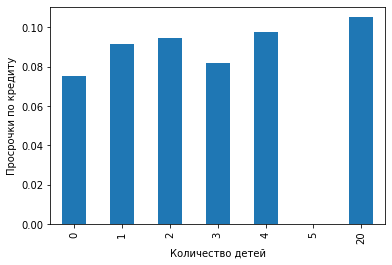

In [66]:
plot_children = df.groupby('children')['debt'].mean().plot(kind='bar')
plot_children.set_ylabel('Просрочки по кредиту')
plot_children.set_xlabel('Количество детей')
plot_children;

На графике наглядно видно зависимость между наличием детей и просрочкакми возврата кредита.

- Меньше всего - 7,5% просрочек допускают лица, у которых нет детей. 
- Просрочка при наличии детей возникает у 9.21% заемщиков
- Семьи с 20 детьми чаще всего пропускают срок выплаты - в 10 % случаев, что неудивительно).

Таким образом, заемщики с детьми на 1,7% чаще допскают просрочку. Много или это мало? Вопрос.

- **Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [67]:
df.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
Не женат / не замужем,2813,0.097405
в разводе,1195,0.071130
вдовец / вдова,960,0.065625
гражданский брак,4177,0.092890
женат / замужем,12380,0.075202


In [68]:
#add pivot after review
family_status = df.pivot_table(index='family_status', values='debt', aggfunc={'count', 'mean'})
family_status

,count,mean
family_status,,
Не женат / не замужем,2813.0,0.097405
в разводе,1195.0,0.071130
вдовец / вдова,960.0,0.065625
гражданский брак,4177.0,0.092890
женат / замужем,12380.0,0.075202


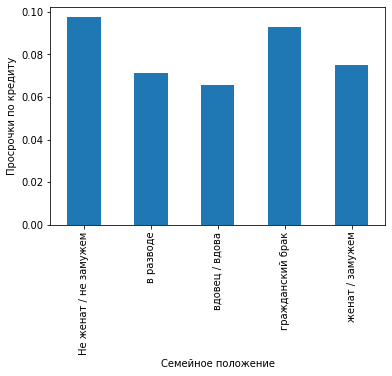

In [69]:
plot_family_status = df.groupby('family_status')['debt'].mean().plot(kind='bar')
plot_family_status.set_ylabel('Просрочки по кредиту')
plot_family_status.set_xlabel('Семейное положение')
plot_family_status;

Исходя из графика тяжело проследить зависимость между семейным положением и наличием просрочек. 

Однако заметим 2 особенности: 
- вдовцы и вдовы допускают просрочки чуть реже
- пары, живущие в официальном браке, почти на 2% реже допускают просрочки, чем пары, живущие в гражданском браке. Общий бюджет - общая ответственность)

- **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Для удобства разделим доход по выборке на 5 равных групп используя 'qcut' и посчитаем процент задолженности.

In [70]:
df['income_group'] = pd.qcut(df['total_income'],5)
df.groupby('income_group')['debt'].agg(['count','mean'])

,count,mean
income_group,,
"(20667.263, 98662.456]",4305,0.080139
"(98662.456, 133663.456]",4836,0.079198
"(133663.456, 156178.396]",3774,0.089560
"(156178.396, 214254.147]",4305,0.086411
"(214254.147, 2265604.029]",4305,0.070383


In [71]:
#add pivot after review
income_group = df.pivot_table(index='income_group', values='debt', aggfunc={'count', 'mean'})
income_group

,count,mean
income_group,,
"(20667.263, 98662.456]",4305.0,0.080139
"(98662.456, 133663.456]",4836.0,0.079198
"(133663.456, 156178.396]",3774.0,0.089560
"(156178.396, 214254.147]",4305.0,0.086411
"(214254.147, 2265604.029]",4305.0,0.070383


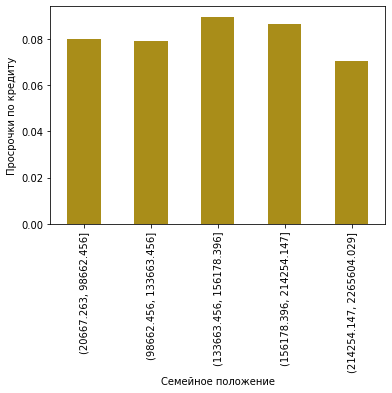

In [72]:
plot_income = df.groupby('income_group')['debt'].mean().plot(kind='bar', color='#a98d19')
plot_income.set_ylabel('Просрочки по кредиту')
plot_income.set_xlabel('Семейное положение')
plot_income;

Закономерность между уровнем дохода и возвратом кредита вполне логична: люди с наибольшим доходом (более 214 тыс.) совершают просрочки реже - менее, чем в 7% случаев.

Можно было выбрать и более четкие параметры категорий по доходу для большей наглядности, но оставим так, чтобы выборки были более равные.

- **Как разные цели кредита влияют на его возврат в срок?**

In [73]:
df.groupby('purpose_cat')['debt'].agg(['count','mean']).sort_values(by='mean',ascending=True)

,count,mean
purpose_cat,,
ремонт,612,0.057190
недвижимость,8913,0.072703
коммерческая недвижимость,1315,0.075285
свадьба,2348,0.079216
образование,4022,0.091994
автомобиль,4315,0.093395


Неожиданно, самым вовремя "возвращаемым" кредитом оказался кредит на ремонт. Выдача же денежных средств на покупку автомобиля и образование являются наиболее рисковыми историями.

Выделяя в отдельную категорию коммерческую недвижимость, мы рассчитывали увидеть отличия в % возврата от покупки жилья, но предположение не подтвердилось. В обоих случаях процент просрочек примерно одинаков и равен 7,2-7,5%

###  Общий вывод <a name="p4"></a>

В ходе исследования была проанализирована статистика платёжеспособности клиентов.
<font color=006699>

Были обработаны пропуски методом замены пустого дохода на медианное значение по возрасту заемщика, разбитого на 3 категории.
Пропуски могли появиться ввиду прогрмамной ошибки при заполнении данных, рекомендую обратиться к разработчикам с целью недопущения их возникновения.
    
Произведена замена дробного типа на целочисленный, удалены дубликаты в категории образование. Рекомендую программистам переработать справочник.

</font>
Обработанные данные были лемматизированы с целью выделения категорий.

Были выявлены закономерности между наличием детей/целью кредита/уровнем дохода и вероятностью просрочек

Результаты исследования могут быть учтены при построении модели специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<font color=006699>
<h4>Рекомендации</h4>
    - обратиться к программистам и уточнить причину возникновения пропусков в слобцах `total_income` и `days_employed`;
    - обратиться к программистам и уточнить причину возникновения отрицательных значений в столбцах `children`,`days_employed`;
    - разработать функцию для оценки рисков невозврата крелита на основании найденных закономерностей.
</font>